In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


# Processamento dos Dados

In [ ]:
# Carregar o conjunto de dados cifar10 e dividir em treinamento e teste
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

mySeed = 221
tf.random.set_seed(seed = mySeed)
np.random.seed(seed = mySeed)
random.seed(mySeed)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step



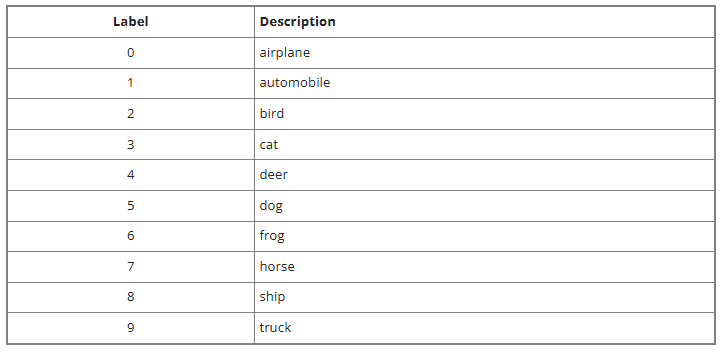





In [ ]:
print(x_train)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [ ]:
# Verificando as dimensões dos conjuntos
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (50000, 32, 32, 3)
y_train: (50000, 10)
X_test: (10000, 32, 32, 3)
y_test: (10000, 10)


In [ ]:
# Plota imagens aleatorios do dataset
def printImg(x, y, RotuloPred = False):
  random_indices = np.random.randint(0, len(x_test), 25)
  images = x[random_indices]
  labels = y[random_indices]
  plt.figure(figsize=(10,10))
  for idx in range(len(random_indices)):
      image = images[idx]
      label = labels[idx]
      plt.subplot(5, 5, idx + 1)
      plt.imshow(image, cmap='gray')
      plt.axis('off')
      if (RotuloPred == True):
        prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
        plt.title(f'Label: {label.argmax()}, Predicted: {prediction}',fontsize=9)
      else:
        plt.title(f'Label: {label.argmax()}')

  plt.show()

In [ ]:

def PrintImgWrong(x_test,predicted_labels, true_labels, WrongPred = True):
  if(WrongPred == True):
    # Encontrar índices das previsões erradas
    pred_indices = np.where(predicted_labels != true_labels)[0]
    print(f'Quantidade de Previsões erradas: {len(pred_indices)}')
  else:
    # Encontrar índices das previsões corretas
    pred_indices = np.where(predicted_labels == true_labels)[0]
    print(f'Quantidade de Previsões corretas: {len(pred_indices)}')

  if(len(pred_indices) < 25):
    random_indices = np.random.choice(pred_indices,size= len(pred_indices),replace=True)
  else:
    random_indices = np.random.choice(pred_indices, 25,replace=True)
  print(f'Indices Selecionados: {random_indices}')
  images = x_test[random_indices]
  labels = true_labels[random_indices]
  predicted = predicted_labels[random_indices]

  # Print imgs
  plt.figure(figsize=(10,10))
  for idx in range(len(random_indices)):
      image = images[idx]
      true_label = labels[idx]
      predicted_label = predicted[idx]
      plt.subplot(5, 5, idx + 1)
      plt.axis('off')
      plt.imshow(image, cmap='gray')
      plt.title(f'True: {true_label}, Predicted: {predicted_label}',fontsize=9)
  plt.show()

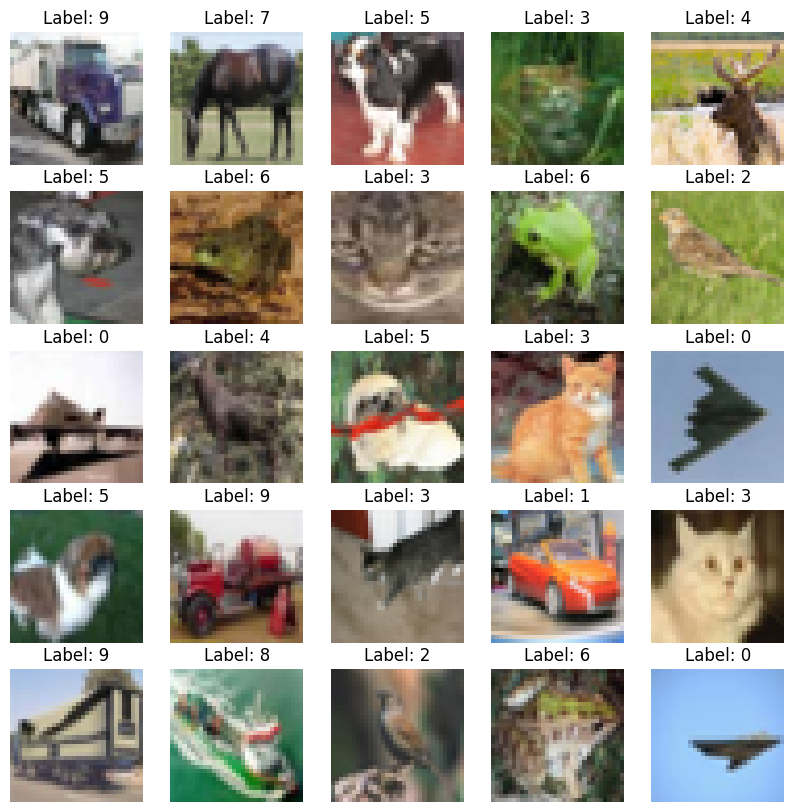

In [ ]:
printImg(x_test,y_test,False)

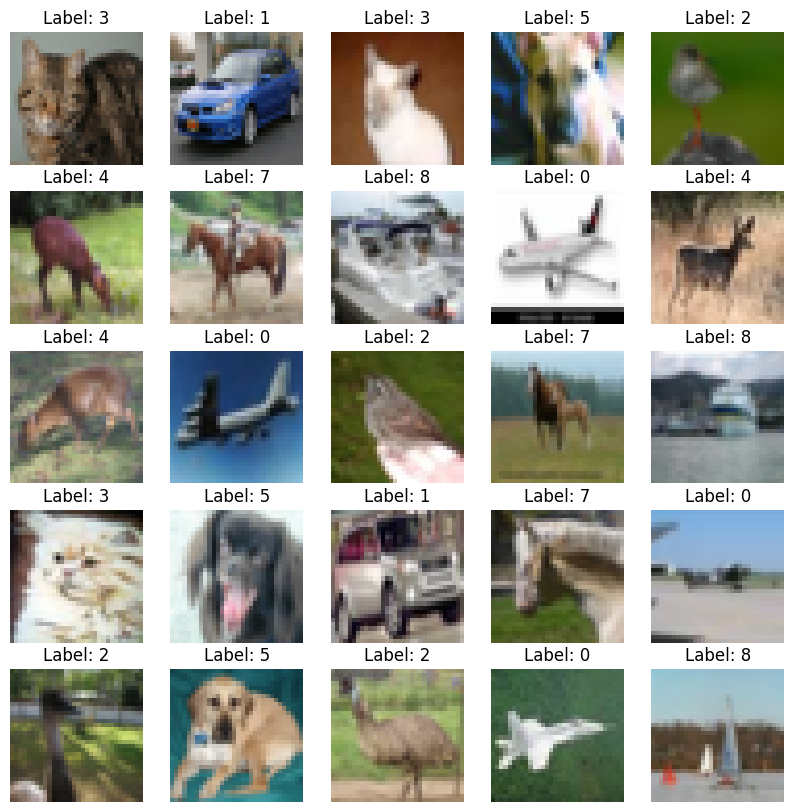

In [ ]:
printImg(x_train,y_train,False)

# Argumentos de entrada

In [ ]:
# Reseta os ids das camadas
tf.keras.backend.clear_session()

# treinamento em batch (blocos de entradas)
batch_size = 64
# numero de classes do problema
num_classes = 10
# numero de epocas que iremos treinar o algoritmo
epochs = 20
# Dimensoes das imagem de entrada
img_rows = img_cols = x_train.shape[1]
input_shape = x_train.shape[1:]
print(f'input_shape: {input_shape}')

input_shape: (32, 32, 3)


# MLP

In [ ]:
"""
# Criar o modelo da MLP
modelMLP = Sequential([
    Flatten(input_shape=input_shape),  #
    Dense(128, activation='relu'),  # Camada oculta com ativação ReLU (Rectified Linear Activation)
    Dense(64, activation='relu'),   # Camada oculta com ativação ReLU (Rectified Linear Activation)
    Dense(10, activation='softmax') # Camada de saída com ativação Softmax para classificação
])

modelMLP.summary()
"""

"\n# Criar o modelo da MLP\nmodelMLP = Sequential([\n    Flatten(input_shape=input_shape),  # \n    Dense(128, activation='relu'),  # Camada oculta com ativação ReLU (Rectified Linear Activation)\n    Dense(64, activation='relu'),   # Camada oculta com ativação ReLU (Rectified Linear Activation)\n    Dense(10, activation='softmax') # Camada de saída com ativação Softmax para classificação\n])\n\nmodelMLP.summary()\n"

In [ ]:
"""
# Compilar o modelo
modelMLP.compile(
    # "Adam" (Adaptive Moment Estimation)
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Treinar o modelo
modelMLP.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.3)

# Avaliar o desempenho do modelo no conjunto de teste
test_loss, test_accuracy = modelMLP.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')
"""

'\n# Compilar o modelo\nmodelMLP.compile(\n    # "Adam" (Adaptive Moment Estimation)\n    optimizer=\'adam\',\n    loss=\'categorical_crossentropy\',\n    metrics=[\'accuracy\'])\n\n# Treinar o modelo\nmodelMLP.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.3)\n\n# Avaliar o desempenho do modelo no conjunto de teste\ntest_loss, test_accuracy = modelMLP.evaluate(x_test, y_test)\nprint(f\'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%\')\n'

In [ ]:
"""
# Faça a predição do modelo no teste
predictions = modelMLP.predict(x_test)

# Pega as labels das predições
predicted_labels = np.argmax(predictions, axis=1)

# Pega as labels reais
true_labels = np.argmax(y_test, axis=1)

# Print das imagens, WrongPred = True para as predições erradas
PrintImgWrong(x_test,predicted_labels,true_labels,WrongPred = True)
"""

'\n# Faça a predição do modelo no teste\npredictions = modelMLP.predict(x_test)\n\n# Pega as labels das predições\npredicted_labels = np.argmax(predictions, axis=1)\n\n# Pega as labels reais\ntrue_labels = np.argmax(y_test, axis=1)\n\n# Print das imagens, WrongPred = True para as predições erradas\nPrintImgWrong(x_test,predicted_labels,true_labels,WrongPred = True)\n'

In [ ]:
"""
# Print das imagens, WrongPred = False para as predições corretas
PrintImgWrong(x_test,predicted_labels,true_labels,WrongPred = False)
"""

'\n# Print das imagens, WrongPred = False para as predições corretas\nPrintImgWrong(x_test,predicted_labels,true_labels,WrongPred = False)\n'

# CNN

In [ ]:
# Reseta os ids das camadas
tf.keras.backend.clear_session()

# Cria CNN usando arquitetura sequencial
cnnModel = Sequential(
    [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
    ]
)
cnnModel.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062,858 (4.05 MB)

 Trainable params: 1,062,858 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnnModel.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = cnnModel.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split=0.2
)

scores = cnnModel.evaluate(
    x_test,
    y_test,
    verbose=1
)

print(f'Test loss: {scores[0]}')
print(f'Test accuracy: {scores[1]}')

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2924 - loss: 1.8927 - val_accuracy: 0.5233 - val_loss: 1.3162
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5195 - loss: 1.3218 - val_accuracy: 0.6236 - val_loss: 1.0656
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6017 - loss: 1.1239 - val_accuracy: 0.6625 - val_loss: 0.9692
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6472 - loss: 0.9972 - val_accuracy: 0.6978 - val_loss: 0.8551
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6802 - loss: 0.9043 - val_accuracy: 0.7225 - val_loss: 0.7871
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7052 - loss: 0.8395 - val_accuracy: 0.7379 - val_loss: 0.7499
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7228 - loss: 0.7839 - val_accuracy: 0.7422 - val_loss: 0.7369
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7383 - loss: 0.7387 - val_accuracy: 0

In [ ]:
# Faça a predição do modelo no teste
predictions = cnnModel.predict(x_test)

# Pega as labels das predições
predicted_labels = np.argmax(predictions, axis=1)

# Pega as labels reais
true_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Quantidade de Previsões erradas: 2533
Indices Selecionados: [1571 1612 1440 1885 1905 3165 1261 2479 5590 9643 1103 9402 7217 9737
 3221 6704 5102 7983 8110 1304 5867 2022 8553 2499 2481]


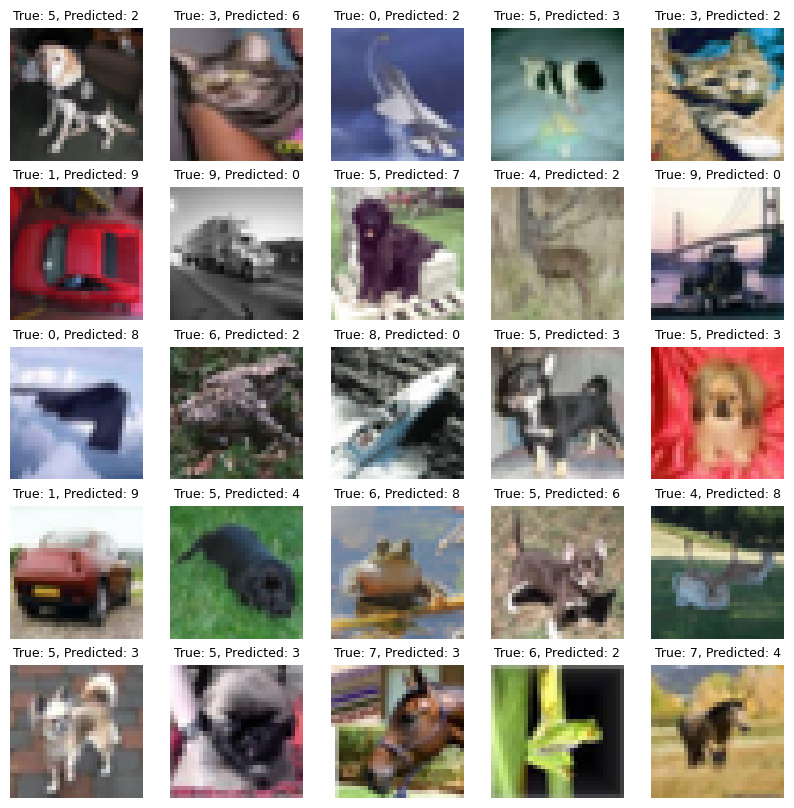

In [ ]:
# Print das imagens, WrongPred = True para as predições erradas
PrintImgWrong(x_test,predicted_labels,true_labels,WrongPred = True)

Quantidade de Previsões corretas: 7467
Indices Selecionados: [4815 1140 2685 9018 6878 8836 8154 1281 8431 1428 3009  600 4579 3694
 2967 9635 9418 6488 9495 4718 9663 3133 5842 8282 5414]


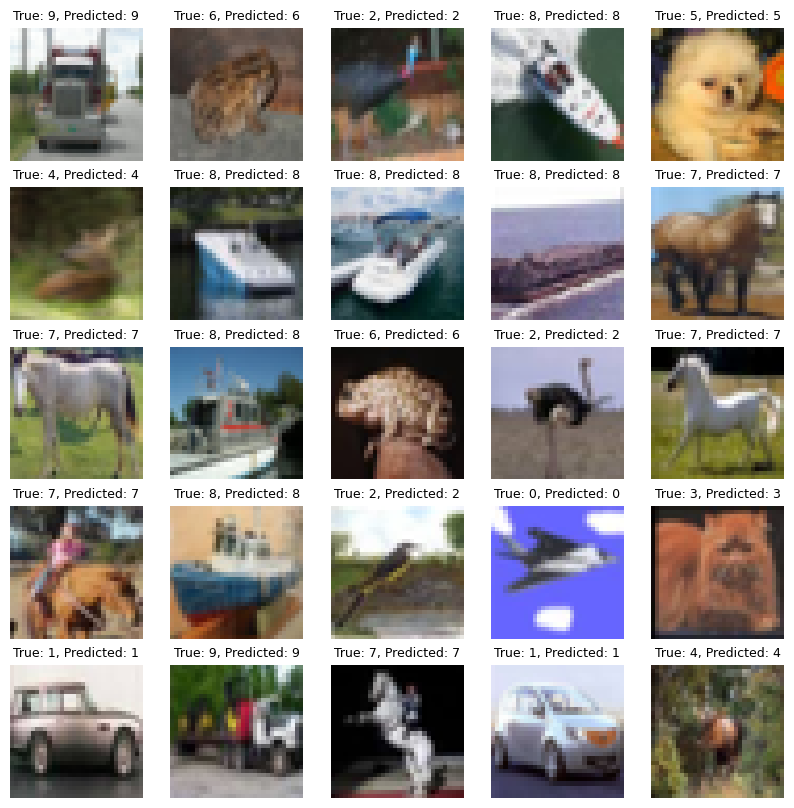

In [ ]:
# Print das imagens, WrongPred = False para as predições corretas
PrintImgWrong(x_test,predicted_labels,true_labels,WrongPred = False)